# Implement handwritten digit from scratch using Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = train.drop('label', axis = 1)
y = train['label']

y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
#Exploring the data¶

Text(0.5, 0, 'Labels')

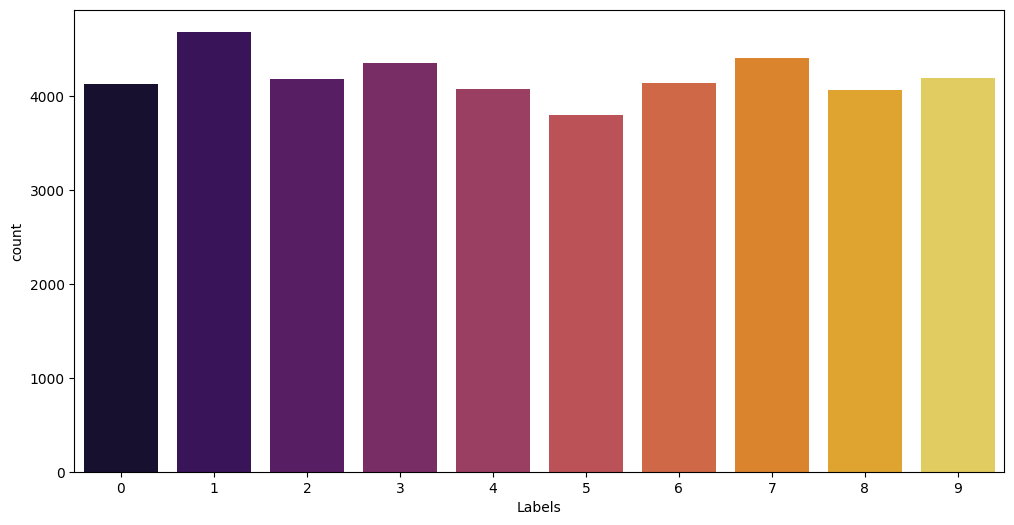

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x = y, data = train, palette = 'inferno')
plt.xlabel('Labels')

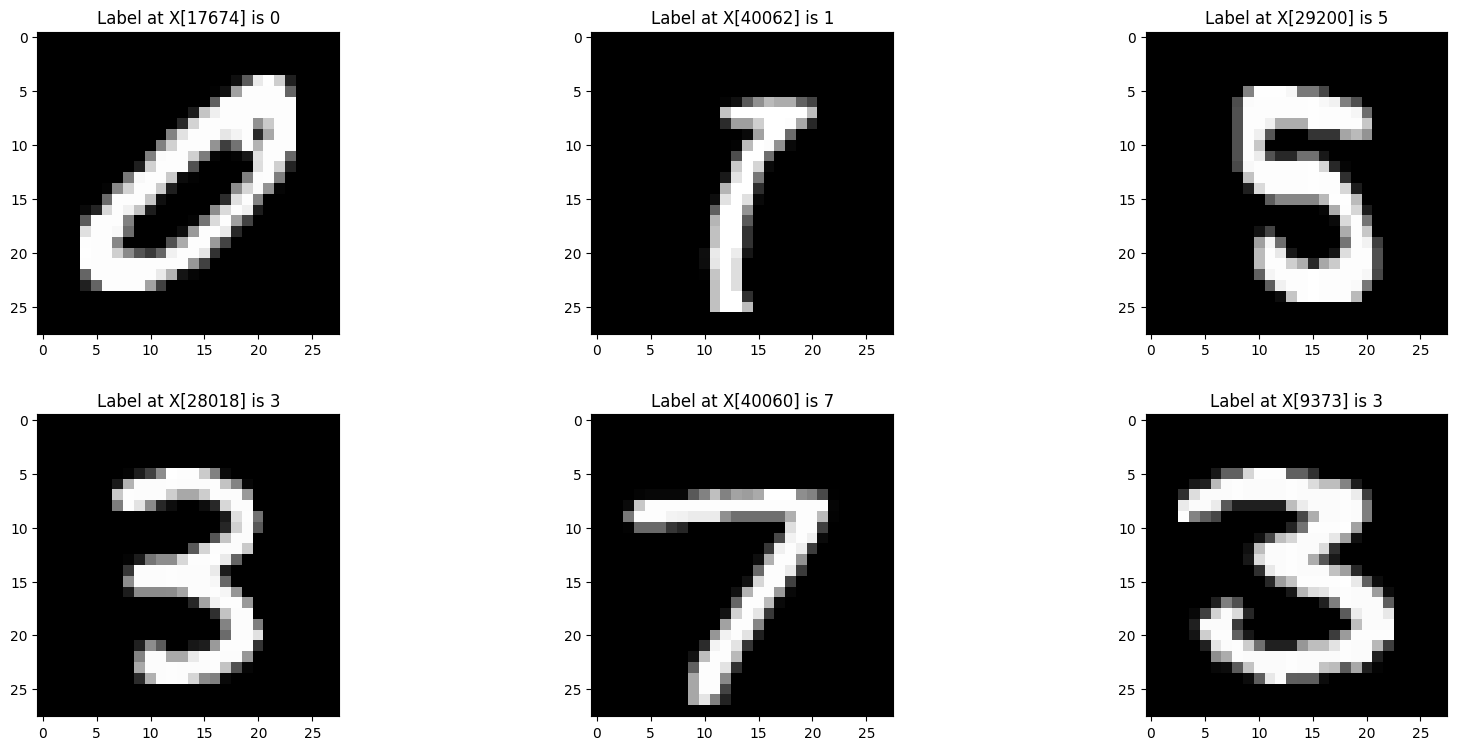

In [8]:
np.random.seed(10)
plt.figure(figsize=(18,8))
for i, j in enumerate(np.random.randint(1, X.shape[0], size = 6)):
    plt.subplot(2, 3, i+1)
    plt.imshow(X.values[j].reshape(28, 28), cmap = 'gray')
    plt.title(f'Label at X[{j}] is {y[j]}')
plt.tight_layout(pad=2.5)

In [9]:
#Standardizing the data

In [10]:
X = X / 255.0
test = test / 255.0

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
#Preparing the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(37800, 784) (4200, 784) (37800,) (4200,)


In [14]:
#Now, we begin to build the Neural Network from scratch

1. Initializing our model parameters:
a. W1 - Contains a matrix of weights for the hidden layer of shape (10 x 784)
b. b1 - Contains the bias term that will be added to the hidden layer of shape (10 x 1)
c. W2 - Contains a matrix of weights for the output layerof shape (10 x 10)
d. b2 - Contains the bias term that will be added to the output layer of shape (10 x 1)¶

In [15]:
def init_params():
    #Hidden Layer parameters
    W1 = np.random.randn(10, 784) * np.sqrt(2/784)
    b1 = np.zeros((10, 1))
    
    #Output layer parameters
    W2 = np.random.randn(10, 10) * np.sqrt(2/10)
    b2 = np.zeros((10, 1))
    
    return W1, b1, W2, b2

In [16]:
def ReLU(x):
    return np.maximum(0, x)

In [17]:
def softmax(z):
    exp_z = np.exp(z - np.max(z))
    return exp_z / exp_z.sum(axis = 0)

In [18]:
 #Feed Forward:

In [19]:
def feed_forward(W1, b1, W2, b2, x):
    #Hidden Layer 
    Z1 = W1.dot(x.T) + b1  #Matrix Multiplication with the input layer
    a1 = ReLU(Z1)  #ReLU Activation
    
    #Output Layer
    Z2 = W2.dot(a1) + b2  #Matrix Multiplication with the hidden layer 
    a2 = softmax(Z2)  #Softmax Activation
    
    return Z1, a1, Z2, a2

In [20]:
#One-Hot Encoding the labels:

In [21]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.max() + 1, Y.size)) 
    one_hot_Y[Y, np.arange(Y.size)] = 1 
    return one_hot_Y

In [22]:
## Backpropagation:

In [23]:
def back_propagation(Z1, a1, Z2, a2, W1, W2, x, y):
    m = x.shape[0]
    one_hot_y = one_hot(y)  #Encoding the labels
    
    #Output Layer derivatives
    dZ2 = 2*(a2 - one_hot_y)  #Derivative of the softmax function
    dW2 = dZ2.dot(a1.T) / m  #Derivative of output weigths
    dB2 = np.sum(dZ2, 1) / m  #Derivative of output biases
    
    #Hidden Layer derivatives
    dZ1 = W2.dot(dZ2) * (Z1 > 0)  #Derivative of the hidden layer and ReLU function
    dW1 = dZ1.dot(x) / m  #Derivative of the hidden layer weights
    dB1 = np.sum(dZ1, 1) / m  #Derivative of the hidden layer biases
    return dW1, dB1, dW2, dB2 

In [24]:
def update_params(W1, b1, W2, b2, dW1, dB1, dW2, dB2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * np.reshape(dB1,(10, 1))
    W2 -= alpha * dW2
    b2 -= alpha * np.reshape(dB2, (10, 1))
    return W1, b1, W2, b2   

In [25]:
#Calculate Loss and Accuracy

In [26]:
def loss_and_accuracy(y_pred, y_true):
    #Cross-Entropy Loss
    epsilon = 1e-10  #Constant
    m = y_true.shape[0]
    pred_loss = np.clip(y_pred, epsilon, 1.0 - epsilon)
    loss = -np.sum(y_true * np.log(pred_loss)) / m
    
    #Accuracy
    accuracy = np.mean(y_pred == y_true)
    return loss, accuracy

In [27]:
#Building the final model

In [28]:
def neural_network(x, y, epochs, alpha):
    W1, b1, W2, b2 = init_params()
    #epoch = no. of iterations
    for epoch in range(epochs):            
        Z1, a1, Z2, a2 = feed_forward(W1, b1, W2, b2, x)
        dW1, dB1, dW2, dB2 = back_propagation(Z1, a1, Z2, a2, W1, W2, x, y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, dB1, dW2, dB2, alpha)
        if epoch % 100 == 0:
            print('Epoch: ', epoch)
            pred = np.argmax(a2, 0)
            loss, accuracy = loss_and_accuracy(pred, y)
            print(f'Loss: {loss:.4f}\t Accuracy: {accuracy*100:.2f} %')
    return W1, b1, W2, b2


In [29]:
W1, b1, W2, b2 = neural_network(X_train, y_train, 2001, 0.1)

Epoch:  0
Loss: 22.5221	 Accuracy: 11.08 %
Epoch:  100
Loss: 1.3663	 Accuracy: 85.70 %
Epoch:  200
Loss: 0.8114	 Accuracy: 89.30 %
Epoch:  300
Loss: 0.7334	 Accuracy: 90.47 %
Epoch:  400
Loss: 0.6816	 Accuracy: 91.19 %
Epoch:  500
Loss: 0.6219	 Accuracy: 91.65 %
Epoch:  600
Loss: 0.5970	 Accuracy: 91.96 %
Epoch:  700
Loss: 0.6012	 Accuracy: 92.17 %
Epoch:  800
Loss: 0.5823	 Accuracy: 92.39 %
Epoch:  900
Loss: 0.5799	 Accuracy: 92.52 %
Epoch:  1000
Loss: 0.5689	 Accuracy: 92.69 %
Epoch:  1100
Loss: 0.5513	 Accuracy: 92.81 %
Epoch:  1200
Loss: 0.5507	 Accuracy: 92.92 %
Epoch:  1300
Loss: 0.5354	 Accuracy: 93.04 %
Epoch:  1400
Loss: 0.5269	 Accuracy: 93.13 %
Epoch:  1500
Loss: 0.5202	 Accuracy: 93.21 %
Epoch:  1600
Loss: 0.5044	 Accuracy: 93.30 %
Epoch:  1700
Loss: 0.5074	 Accuracy: 93.39 %
Epoch:  1800
Loss: 0.4928	 Accuracy: 93.46 %
Epoch:  1900
Loss: 0.4910	 Accuracy: 93.53 %
Epoch:  2000
Loss: 0.4977	 Accuracy: 93.58 %


In [30]:
#Making predictions

In [31]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = feed_forward(W1, b1, W2, b2, X)
    pred = np.argmax(A2, 0)
    return pred

In [32]:
def test_prediction(x, y, W1, b1, W2, b2):
    np.random.seed(151)
    plt.figure(figsize=(14, 10))
    prediction = make_predictions(X_test, W1, b1, W2, b2)
    for i, j in enumerate(np.random.randint(1, x.shape[1], size = 12)):
        plt.subplot(3, 4, i+1)
        plt.imshow(x[j].reshape(28, 28), cmap = 'gray')
        plt.title(f'Prediction at X[{j}] is {prediction[j]}')
        plt.xlabel(f'Label at X[{j}] is {y[j]}')
    plt.tight_layout(pad = 2)

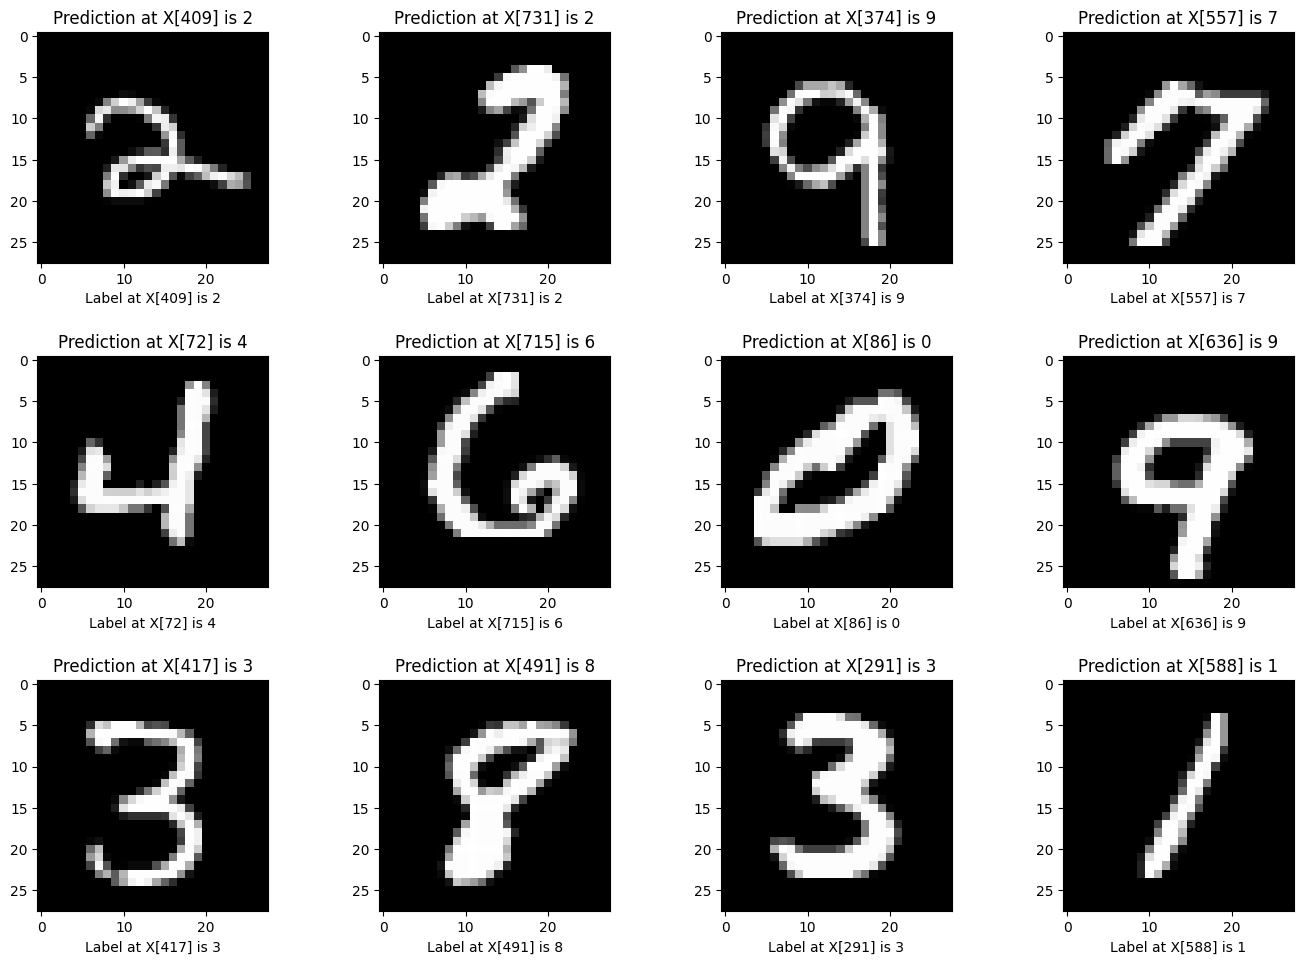

In [33]:
test_prediction(X_test, y_test, W1, b1, W2, b2)

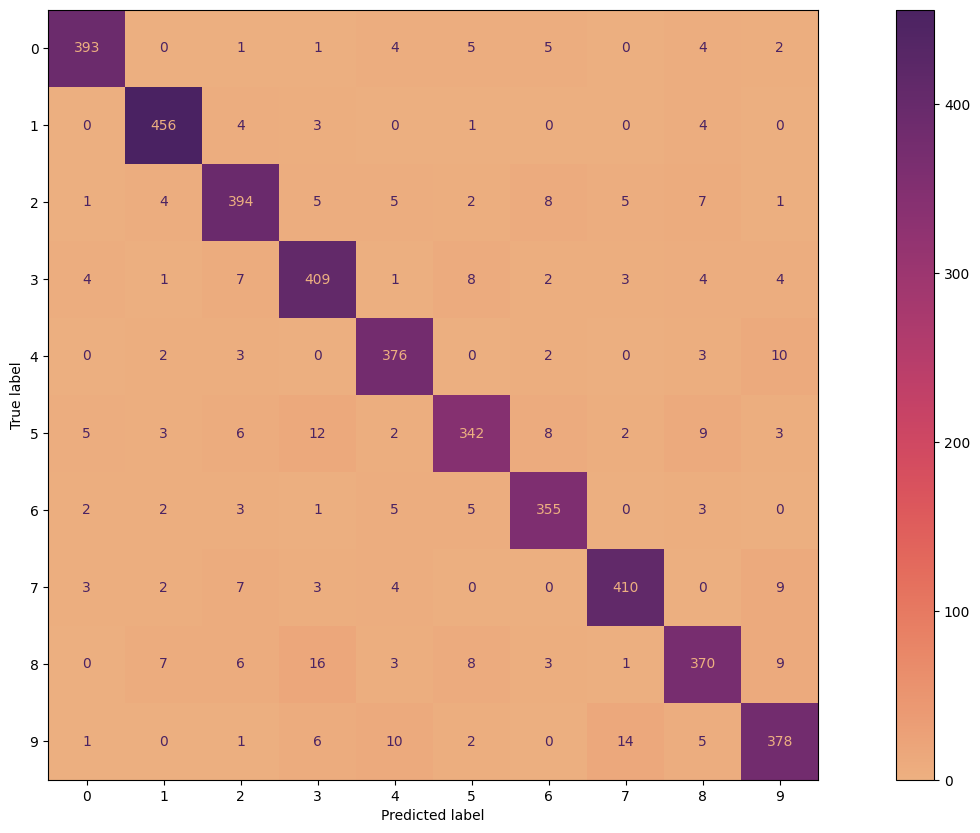

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

pred = make_predictions(X_test, W1, b1, W2, b2)
fig, ax = plt.subplots(1, 1, figsize = (20,10))
ConfusionMatrixDisplay.from_predictions(y_test, pred, 
                                        ax = ax, cmap = 'flare');